# Statoil/C-CORE Iceberg Classifier Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Let's import the data
trainData = pd.read_json('train.json')
testData = pd.read_json('test.json')

## Data Exploration

In [2]:
#Let's see a sample of the train data
print('Train Data Sample:\n', trainData.head())

#Let's see a sample of the test data
print('\nTest Data Sample:\n', testData.head())

Train Data Sample:
                                               band_1  \
0  [-27.878360999999998, -27.15416, -28.668615, -...   
1  [-12.242375, -14.920304999999999, -14.920363, ...   
2  [-24.603676, -24.603714, -24.871029, -23.15277...   
3  [-22.454607, -23.082819, -23.998013, -23.99805...   
4  [-26.006956, -23.164886, -23.164886, -26.89116...   

                                              band_2        id inc_angle  \
0  [-27.154118, -29.537888, -31.0306, -32.190483,...  dfd5f913   43.9239   
1  [-31.506321, -27.984554, -26.645678, -23.76760...  e25388fd   38.1562   
2  [-24.870956, -24.092632, -20.653963, -19.41104...  58b2aaa0   45.2859   
3  [-27.889421, -27.519794, -27.165262, -29.10350...  4cfc3a18   43.8306   
4  [-27.206915, -30.259186, -30.259186, -23.16495...  271f93f4   35.6256   

   is_iceberg  
0           0  
1           0  
2           1  
3           0  
4           0  

Test Data Sample:
                                               band_1  \
0  [-15.863251

Number of Samples in Train Dataset:  1604
Number of Samples in Test Dataset:  8424


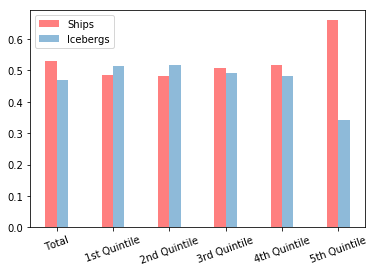

In [3]:
#Statistics about the datasets
#First total number of samples in each dataset
numberTrainSamples = len(trainData)
numberTestSamples = len(testData)
print('Number of Samples in Train Dataset: ', numberTrainSamples)
print('Number of Samples in Test Dataset: ', numberTestSamples)

# Initialize empty lists for storing the fractions of each class in train dataset
trainShips = []
trainIcebergs = []

# Calculate the fraction of each class for the total train dataset
totalTrainClassDistribution = trainData['is_iceberg'].value_counts()
trainShips.append(totalTrainClassDistribution[0]/(totalTrainClassDistribution[0]+totalTrainClassDistribution[1]))
trainIcebergs.append(totalTrainClassDistribution[1]/(totalTrainClassDistribution[0]+totalTrainClassDistribution[1]))

# Calculate the fraction of each class for each quintile of the train dataset
for i in range(5):
    trainQuintile = round(0.2*numberTrainSamples)
    classDistribution = trainData['is_iceberg'][i*trainQuintile:(i+1)*trainQuintile].value_counts()
    trainShips.append(classDistribution[0]/(classDistribution[0]+classDistribution[1]))
    trainIcebergs.append(classDistribution[1]/(classDistribution[0]+classDistribution[1]))

# Plot the fraction of each class as a paired bar chart for the total train dataset and each quintile
columns = np.arange(0,24,4)
ships = plt.bar(columns-0.8, trainShips, align='edge', color='r', alpha=0.5, linewidth = 50)
icebergs = plt.bar(columns, trainIcebergs, align='edge', alpha=0.5)
plt.xticks(columns, ['Total', '1st Quintile', '2nd Quintile', '3rd Quintile', '4th Quintile', '5th Quintile'],rotation=20)
plt.legend((ships[0], icebergs[0]), ('Ships', 'Icebergs'))
plt.autoscale(enable=True, axis='both', tight=None)
plt.savefig('Class Distribution.jpg')
plt.show()

In [4]:
# Print the statistics of the Incedence Angle for both train and test dataset
# Missing 'na' data from the train dataset not included in statistical calculations
print('Statistics on Incedence Angle Training Data:\n',trainData['inc_angle'].replace('na',np.nan).describe())
print('\nStatistics on Incedence Angle Test Data:\n',testData['inc_angle'].describe())

Statistics on Incedence Angle Training Data:
 count    1471.000000
mean       39.268707
std         3.839744
min        24.754600
25%        36.106100
50%        39.501500
75%        42.559100
max        45.937500
Name: inc_angle, dtype: float64

Statistics on Incedence Angle Test Data:
 count    8424.000000
mean       40.153403
std         4.108386
min        23.080500
25%        36.905200
50%        40.375790
75%        43.472950
max        50.661785
Name: inc_angle, dtype: float64


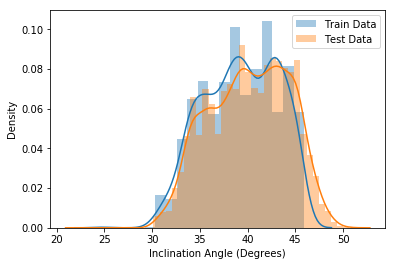

In [5]:
# Visualized the distribution of inclination in the train and test data with a histogram and kernal density estimation
sns.distplot(trainData['inc_angle'].replace('na',np.nan).dropna(), label='Train Data')
sns.distplot(testData['inc_angle'], label='Test Data')
plt.legend()
plt.xlabel('Inclination Angle (Degrees)')
plt.ylabel('Density')
plt.savefig('Inclination Angle Distribution.jpg')
plt.show()

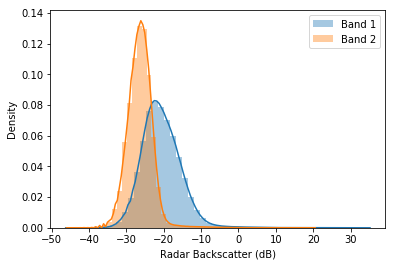

In [6]:
# Visualize the cumulative distribution of backscatter at each dB with a histogram and kernal density estimation
totalBand1 = []
totalBand2 = []
for imageVector in trainData['band_1']:
    for dB in imageVector:
        totalBand1.append(dB)
for imageVector in trainData['band_2']:
    for dB in imageVector:
        totalBand2.append(dB)
sns.distplot(totalBand1, label='Band 1')
sns.distplot(totalBand2, label='Band 2')
plt.legend()
plt.autoscale()
plt.xlabel('Radar Backscatter (dB)')
plt.ylabel('Density')
plt.savefig('Radar Backscatter Distribution.jpg')
plt.show()

### Exploratory Visualization

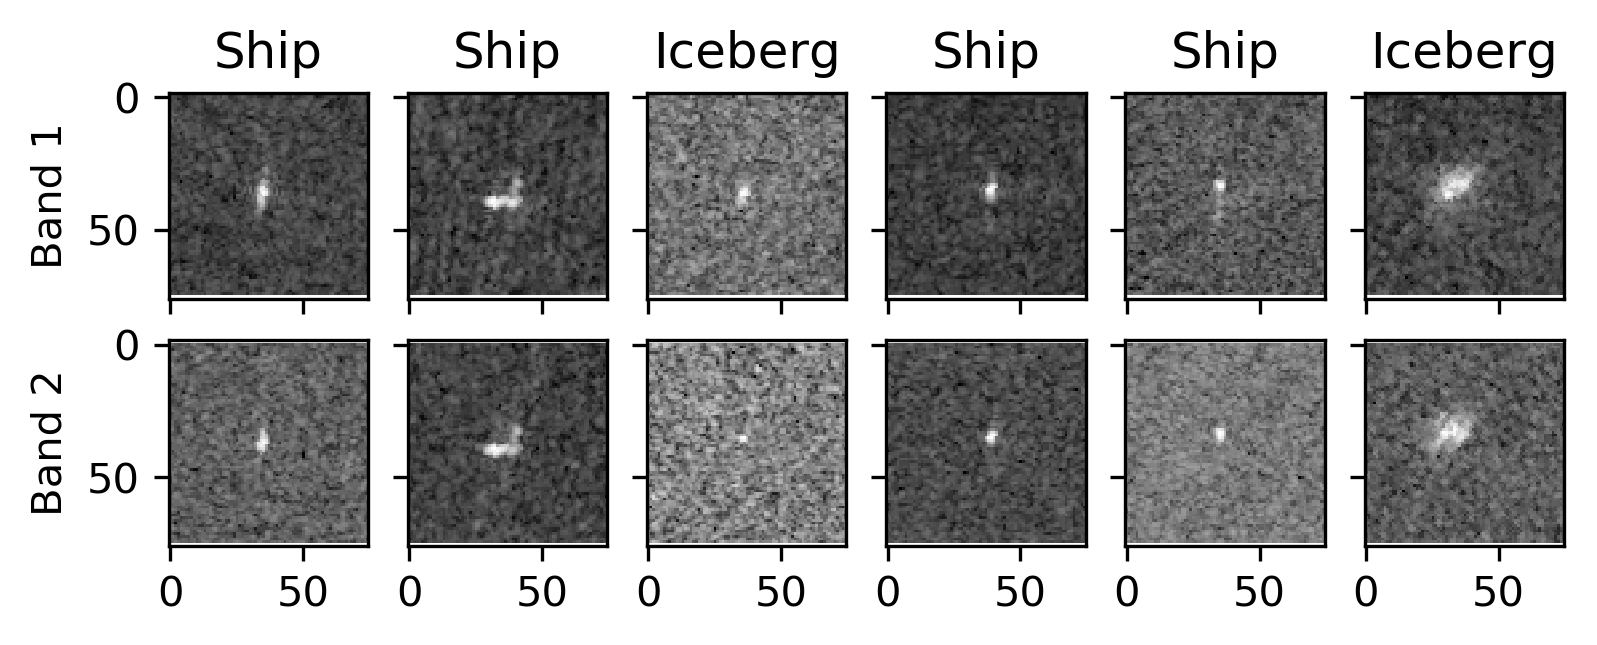

In [7]:
# Visualize the first 6 samples of the train dataset by looking at the Band 1 and Band 2 radar images
f, axarr = plt.subplots(nrows=2, ncols=6, sharex=True, sharey=True, figsize=(6,2), dpi=300)
for img in range (6):
    axarr[0, img].imshow(np.array(trainData['band_1'][img]).reshape((75,75)),cmap='binary_r')
    if trainData['is_iceberg'][img]==0:
        axarr[0, img].set_title('Ship')
    else:
        axarr[0, img].set_title('Iceberg')
    axarr[1, img].imshow(np.array(trainData['band_2'][img]).reshape((75,75)),cmap='binary_r')
axarr[0, 0].set_ylabel('Band 1')
axarr[1, 0].set_ylabel('Band 2')
plt.savefig('radar.jpg')
plt.show()

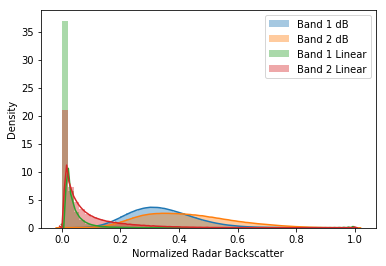

In [8]:
# The radar backscatter data is in decibels. Should the image data be normalized directly using min-max scaling?
# Or should the data be converted to a linear scale first? Min-max scaling is sensitive to outliers.
# So the data should be kept in decibels before normalization to [0,1] range. But let's visualize this.

# Initialize lists for the normalized data.
totalBand1_dB = []
totalBand2_dB = []
totalBand1_linear = []
totalBand2_linear = []

# Directly normalize to [0,1] with min-max scaling for each image.
for imageVector in trainData['band_1']:
    bandVector = np.array(imageVector)
    bandWidth = bandVector.max() - bandVector.min()
    bandVector -= bandVector.min()
    bandVector /= bandWidth
    for dB in bandVector:
        totalBand1_dB.append(dB)
for imageVector in trainData['band_2']:
    bandVector = np.array(imageVector)
    bandWidth = bandVector.max() - bandVector.min()
    bandVector -= bandVector.min()
    bandVector /= bandWidth
    for dB in bandVector:
        totalBand2_dB.append(dB)

# Convert the dB to the linear scale and then normalize to [0,1] with min-max scaling for each image.
for imageVector in trainData['band_1']:
    bandVector = np.array(imageVector)
    bandVector = 10**(bandVector/10)
    bandWidth = bandVector.max() - bandVector.min()
    bandVector -= bandVector.min()
    bandVector /= bandWidth
    for dB in bandVector:
        totalBand1_linear.append(dB)
for imageVector in trainData['band_2']:
    bandVector = np.array(imageVector)
    bandVector = 10**(bandVector/10)
    bandWidth = bandVector.max() - bandVector.min()
    bandVector -= bandVector.min()
    bandVector /= bandWidth
    for dB in bandVector:
        totalBand2_linear.append(dB)

# Visualize the cumulative distribution of backscatter on the normalized scale with a histogram and kernal density estimation.
sns.distplot(totalBand1_dB, label='Band 1 dB')
sns.distplot(totalBand2_dB, label='Band 2 dB')
sns.distplot(totalBand1_linear, label='Band 1 Linear')
sns.distplot(totalBand2_linear, label='Band 2 Linear')
plt.legend()
plt.autoscale()
plt.xlabel('Normalized Radar Backscatter')
plt.ylabel('Density')
plt.savefig('Normalized Backscatter Distribution.jpg')
plt.show()

In [9]:
# As we could see from the KDE graph above, the backscatter data should be normalized directly to [0,1].
# Below is a function that takes in band data. For each image in the band data, it reshapes it to a 75x75 matrix.
# It then appends it to an array of fourth-order tensor of the form [samples, rows, columns, channels]

def makeRadarImage_1ch(band):
    radarImage = np.empty([1,75,75,1])
    for vector in band:
        bandMatrix = np.array(vector).reshape((75, 75))
        bandMatrix = (bandMatrix - bandMatrix.min()) / (bandMatrix.max() - bandMatrix.min())
        bandMatrix = np.expand_dims(bandMatrix, axis=0)
        bandMatrix = np.expand_dims(bandMatrix, axis=-1)
        radarImage = np.concatenate((radarImage, bandMatrix))
    radarImage = np.delete(radarImage, 0, 0)
    return radarImage

In [10]:
# Save the normalized radar backscatter data

bandOneTrain_1ch = makeRadarImage_1ch(trainData['band_1'])
bandTwoTrain_1ch = makeRadarImage_1ch(trainData['band_2'])

In [11]:
labelsTrain = trainData['is_iceberg']

In [12]:
# We have missing values for the inclination angle feature in the train data.
# Filtering out the data may introduce bias and gives us fewer training samples.
# Setting the missing values to 0, the mean after normalization, will make the data noisy. However, that may be okay.

# First lets replace the string text 'na' with numpy NaN values.
trainData['inc_angle'] = trainData['inc_angle'].replace('na',np.nan)

# Let's drop the NaN values.
trainData_noNaN = trainData.dropna()

# From the noNaN dataset, let's get the mean and standard deviation.
incAngleTrain_noNaN = np.array(trainData_noNaN['inc_angle'], dtype=float)
incAngleMean = incAngleTrain_noNaN.mean(dtype=np.float64)
incAngleStd = incAngleTrain_noNaN.std(dtype=np.float64)

# Using the mean and standard deviation, normalize the inclination angle to zero mean and standard deviation of 1.
trainData['inc_angle'] -= incAngleMean
trainData['inc_angle'] /= incAngleStd

# Replace the NaN values with the mean value, 0.0
trainData['inc_angle'] = trainData['inc_angle'].replace(np.nan, 0.0)

incAngleTrain = trainData['inc_angle']

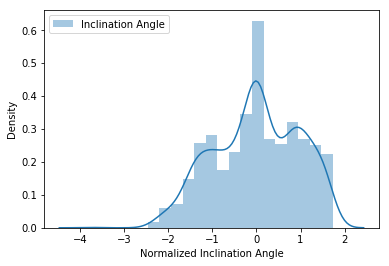

In [13]:
sns.distplot(incAngleTrain, label='Inclination Angle')
plt.legend()
plt.autoscale()
plt.xlabel('Normalized Inclination Angle')
plt.ylabel('Density')
plt.savefig('Normalized Inclination Angle Distribution.jpg')
plt.show()

## Benchmark Model (Model 1)

In [14]:
# Let's establish our benchmark by using a vanilla CNN on one band of radar data.

# Import Keras for the notebook
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout
from keras.models import Model, Sequential
from keras.applications.xception import Xception
from keras.callbacks import ModelCheckpoint

# Define the model architecture
model = Sequential()
model.add(Conv2D(filters= 64, kernel_size=5, strides=1, padding='same', activation='elu', input_shape=(75, 75, 1)))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Conv2D(filters= 64, kernel_size=5, strides=1, padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Conv2D(filters= 64, kernel_size=5, strides=1, padding='same', activation='elu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(500, activation='elu'))
model.add(Dense(500, activation='elu'))
model.add(Dense(500, activation='elu'))
model.add(Dense(1, activation='sigmoid'))

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 75, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 64)        102464    
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               32500     
__________

In [13]:
#Train the model

checkpointer = ModelCheckpoint(filepath='weights.best.band1benchmark.hdf5', verbose=1, save_best_only=True)

model.fit(x=bandOneTrain_1ch, y=labelsTrain, batch_size=100, epochs=300, verbose=1,
          callbacks=[checkpointer], validation_split=0.2, shuffle=True)

Train on 1283 samples, validate on 321 samples
Epoch 1/300
1283/1283 [==============================] - 58s - loss: 0.7071 - acc: 0.5168 - val_loss: 0.6671 - val_acc: 0.6573
Epoch 2/300
1283/1283 [==============================] - 1s - loss: 0.6910 - acc: 0.5394 - val_loss: 0.7918 - val_acc: 0.3427
Epoch 3/300
1283/1283 [==============================] - 1s - loss: 0.6831 - acc: 0.5783 - val_loss: 0.8570 - val_acc: 0.3520
Epoch 4/300
1283/1283 [==============================] - 1s - loss: 0.6934 - acc: 0.5222 - val_loss: 0.7124 - val_acc: 0.4891
Epoch 5/300
1283/1283 [==============================] - 1s - loss: 0.6675 - acc: 0.6469 - val_loss: 0.6679 - val_acc: 0.5607
Epoch 6/300
1283/1283 [==============================] - 1s - loss: 0.6614 - acc: 0.6095 - val_loss: 0.7329 - val_acc: 0.5607
Epoch 7/300
1283/1283 [==============================] - 1s - loss: 0.6450 - acc: 0.6399 - val_loss: 0.8690 - val_acc: 0.5234
Epoch 8/300
1283/1283 [==============================] - 1s - loss: 0.

1283/1283 [==============================] - 1s - loss: 0.6320 - acc: 0.6516 - val_loss: 0.6233 - val_acc: 0.5732
Epoch 33/300
1283/1283 [==============================] - 1s - loss: 0.6226 - acc: 0.6610 - val_loss: 0.6439 - val_acc: 0.5452
Epoch 34/300
1283/1283 [==============================] - 1s - loss: 0.6066 - acc: 0.6726 - val_loss: 0.7226 - val_acc: 0.5265
Epoch 35/300
1283/1283 [==============================] - 1s - loss: 0.6090 - acc: 0.6664 - val_loss: 0.7224 - val_acc: 0.5483
Epoch 36/300
1283/1283 [==============================] - 1s - loss: 0.5979 - acc: 0.6734 - val_loss: 0.6266 - val_acc: 0.5794
Epoch 37/300
1283/1283 [==============================] - 1s - loss: 0.6200 - acc: 0.6602 - val_loss: 0.7054 - val_acc: 0.5109
Epoch 38/300
1283/1283 [==============================] - 1s - loss: 0.6253 - acc: 0.6446 - val_loss: 0.6418 - val_acc: 0.5483
Epoch 39/300
1283/1283 [==============================] - 1s - loss: 0.5947 - acc: 0.6742 - val_loss: 0.6572 - val_acc: 0.56

1283/1283 [==============================] - 1s - loss: 0.4536 - acc: 0.7599 - val_loss: 0.5362 - val_acc: 0.6947
Epoch 97/300
1283/1283 [==============================] - 1s - loss: 0.4572 - acc: 0.7693 - val_loss: 0.6494 - val_acc: 0.6355
Epoch 98/300
1283/1283 [==============================] - 1s - loss: 0.4805 - acc: 0.7506 - val_loss: 0.6250 - val_acc: 0.6199
Epoch 99/300
1283/1283 [==============================] - 1s - loss: 0.4591 - acc: 0.7576 - val_loss: 0.5872 - val_acc: 0.6449
Epoch 100/300
1283/1283 [==============================] - 1s - loss: 0.4829 - acc: 0.7553 - val_loss: 0.5027 - val_acc: 0.6854
Epoch 101/300
1283/1283 [==============================] - 1s - loss: 0.5879 - acc: 0.6991 - val_loss: 0.7539 - val_acc: 0.3707
Epoch 102/300
1283/1283 [==============================] - 1s - loss: 0.6511 - acc: 0.6329 - val_loss: 1.0305 - val_acc: 0.4798
Epoch 103/300
1283/1283 [==============================] - 1s - loss: 0.5981 - acc: 0.6750 - val_loss: 0.7669 - val_acc: 

1283/1283 [==============================] - 1s - loss: 0.4146 - acc: 0.7927 - val_loss: 0.4618 - val_acc: 0.7508
Epoch 130/300
1283/1283 [==============================] - 1s - loss: 0.4273 - acc: 0.7763 - val_loss: 0.5371 - val_acc: 0.7040
Epoch 131/300
1283/1283 [==============================] - 1s - loss: 0.4090 - acc: 0.8005 - val_loss: 0.4956 - val_acc: 0.7383
Epoch 132/300
1283/1283 [==============================] - 1s - loss: 0.4564 - acc: 0.7568 - val_loss: 0.5096 - val_acc: 0.6417
Epoch 133/300
1283/1283 [==============================] - 1s - loss: 0.4198 - acc: 0.7903 - val_loss: 0.4464 - val_acc: 0.8100
Epoch 134/300
1283/1283 [==============================] - 1s - loss: 0.4312 - acc: 0.7779 - val_loss: 0.4508 - val_acc: 0.7290
Epoch 135/300
1283/1283 [==============================] - 1s - loss: 0.4387 - acc: 0.7755 - val_loss: 0.4331 - val_acc: 0.7882
Epoch 136/300
1283/1283 [==============================] - 1s - loss: 0.4230 - acc: 0.7818 - val_loss: 0.5463 - val_ac

1283/1283 [==============================] - 1s - loss: 0.4741 - acc: 0.7420 - val_loss: 0.5346 - val_acc: 0.6636
Epoch 163/300
1283/1283 [==============================] - 1s - loss: 0.4284 - acc: 0.7927 - val_loss: 0.5216 - val_acc: 0.7227
Epoch 164/300
1283/1283 [==============================] - 1s - loss: 0.4221 - acc: 0.7794 - val_loss: 0.6108 - val_acc: 0.6511
Epoch 165/300
1283/1283 [==============================] - 1s - loss: 0.4043 - acc: 0.8012 - val_loss: 0.4811 - val_acc: 0.7290
Epoch 166/300
1283/1283 [==============================] - 1s - loss: 0.3966 - acc: 0.8044 - val_loss: 0.4486 - val_acc: 0.8037
Epoch 167/300
1283/1283 [==============================] - 1s - loss: 0.4017 - acc: 0.7966 - val_loss: 0.5483 - val_acc: 0.6573
Epoch 168/300
1283/1283 [==============================] - 1s - loss: 0.4388 - acc: 0.7732 - val_loss: 0.4102 - val_acc: 0.8255
Epoch 169/300
1283/1283 [==============================] - 1s - loss: 0.4033 - acc: 0.7935 - val_loss: 0.4762 - val_ac

1283/1283 [==============================] - 1s - loss: 0.2868 - acc: 0.8823 - val_loss: 0.4896 - val_acc: 0.8037
Epoch 228/300
1283/1283 [==============================] - 1s - loss: 0.3079 - acc: 0.8535 - val_loss: 0.4626 - val_acc: 0.7882
Epoch 229/300
1283/1283 [==============================] - 1s - loss: 0.2822 - acc: 0.8776 - val_loss: 0.7530 - val_acc: 0.7227
Epoch 230/300
1283/1283 [==============================] - 1s - loss: 0.3036 - acc: 0.8636 - val_loss: 0.4978 - val_acc: 0.7975
Epoch 231/300
1283/1283 [==============================] - 1s - loss: 0.2748 - acc: 0.8745 - val_loss: 0.4484 - val_acc: 0.8131
Epoch 232/300
1283/1283 [==============================] - 1s - loss: 0.3052 - acc: 0.8574 - val_loss: 0.4873 - val_acc: 0.7664
Epoch 233/300
1283/1283 [==============================] - 1s - loss: 0.2679 - acc: 0.8854 - val_loss: 0.4865 - val_acc: 0.8006
Epoch 234/300
1283/1283 [==============================] - 1s - loss: 0.3102 - acc: 0.8511 - val_loss: 0.4018 - val_ac

1283/1283 [==============================] - 1s - loss: 0.2397 - acc: 0.8963 - val_loss: 0.7314 - val_acc: 0.7508
Epoch 261/300
1283/1283 [==============================] - 1s - loss: 0.1965 - acc: 0.9158 - val_loss: 0.5504 - val_acc: 0.8100
Epoch 262/300
1283/1283 [==============================] - 1s - loss: 0.2177 - acc: 0.9026 - val_loss: 0.4981 - val_acc: 0.8318
Epoch 263/300
1283/1283 [==============================] - 1s - loss: 0.2374 - acc: 0.9049 - val_loss: 0.7701 - val_acc: 0.7352
Epoch 264/300
1283/1283 [==============================] - 1s - loss: 0.1986 - acc: 0.9244 - val_loss: 0.6694 - val_acc: 0.7975
Epoch 265/300
1283/1283 [==============================] - 1s - loss: 0.2007 - acc: 0.9119 - val_loss: 0.8579 - val_acc: 0.6667
Epoch 266/300
1283/1283 [==============================] - 1s - loss: 0.1915 - acc: 0.9182 - val_loss: 0.5856 - val_acc: 0.8100
Epoch 267/300
1283/1283 [==============================] - 1s - loss: 0.1907 - acc: 0.9197 - val_loss: 0.4888 - val_ac

## Add Dropout (Model 2)

In [15]:
# Let's add some dropout layers to regularize our vanilla CNN on one band of radar data.

# Import Keras for the notebook
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout
from keras.models import Model, Sequential
from keras.applications.xception import Xception
from keras.callbacks import ModelCheckpoint

# Define the model architecture
model = Sequential()
model.add(Conv2D(filters= 64, kernel_size=5, strides=1, padding='same', activation='elu', input_shape=(75, 75, 1)))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Conv2D(filters= 64, kernel_size=5, strides=1, padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Conv2D(filters= 64, kernel_size=5, strides=1, padding='same', activation='elu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(500, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 75, 75, 64)        1664      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 38, 38, 64)        102464    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 19, 19, 64)        102464    
_________________________________________________________________
global_average_pooling2d_2 ( (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               32500     
__________

In [15]:
#Train the model

checkpointer = ModelCheckpoint(filepath='weights.best.band1benchmark_dropout.hdf5', verbose=1, save_best_only=True)

model.fit(x=bandOneTrain_1ch, y=labelsTrain, batch_size=100, epochs=300, verbose=1,
          callbacks=[checkpointer], validation_split=0.2, shuffle=True)

Train on 1283 samples, validate on 321 samples
Epoch 1/300
1283/1283 [==============================] - 1s - loss: 0.7046 - acc: 0.5238 - val_loss: 0.7010 - val_acc: 0.4081
Epoch 2/300
1283/1283 [==============================] - 1s - loss: 0.6960 - acc: 0.5386 - val_loss: 0.7267 - val_acc: 0.3427
Epoch 3/300
1283/1283 [==============================] - 1s - loss: 0.6949 - acc: 0.5097 - val_loss: 0.7021 - val_acc: 0.5670
Epoch 4/300
1283/1283 [==============================] - 1s - loss: 0.6941 - acc: 0.5503 - val_loss: 0.7653 - val_acc: 0.3551
Epoch 5/300
1283/1283 [==============================] - 1s - loss: 0.6778 - acc: 0.5830 - val_loss: 0.8004 - val_acc: 0.4829
Epoch 6/300
1283/1283 [==============================] - 1s - loss: 0.6799 - acc: 0.5666 - val_loss: 0.6779 - val_acc: 0.5732
Epoch 7/300
1283/1283 [==============================] - 1s - loss: 0.6582 - acc: 0.5970 - val_loss: 0.7128 - val_acc: 0.5794
Epoch 8/300
1283/1283 [==============================] - 1s - loss: 0.6

1283/1283 [==============================] - 1s - loss: 0.4842 - acc: 0.7482 - val_loss: 0.5349 - val_acc: 0.6822
Epoch 65/300
1283/1283 [==============================] - 1s - loss: 0.5025 - acc: 0.7405 - val_loss: 0.6391 - val_acc: 0.6293
Epoch 66/300
1283/1283 [==============================] - 1s - loss: 0.5069 - acc: 0.7334 - val_loss: 0.5957 - val_acc: 0.6168
Epoch 67/300
1283/1283 [==============================] - 1s - loss: 0.4997 - acc: 0.7537 - val_loss: 0.6017 - val_acc: 0.6542
Epoch 68/300
1283/1283 [==============================] - 1s - loss: 0.5101 - acc: 0.7288 - val_loss: 0.5251 - val_acc: 0.6729
Epoch 69/300
1283/1283 [==============================] - 1s - loss: 0.5334 - acc: 0.7303 - val_loss: 0.5095 - val_acc: 0.7321
Epoch 70/300
1283/1283 [==============================] - 1s - loss: 0.5146 - acc: 0.7358 - val_loss: 0.5591 - val_acc: 0.6760
Epoch 71/300
1283/1283 [==============================] - 1s - loss: 0.4739 - acc: 0.7568 - val_loss: 0.4957 - val_acc: 0.70

1283/1283 [==============================] - 1s - loss: 0.4533 - acc: 0.7654 - val_loss: 0.5647 - val_acc: 0.6636
Epoch 96/300
1283/1283 [==============================] - 1s - loss: 0.4479 - acc: 0.7732 - val_loss: 0.5086 - val_acc: 0.7196
Epoch 97/300
1283/1283 [==============================] - 1s - loss: 0.4418 - acc: 0.7849 - val_loss: 0.4636 - val_acc: 0.7445
Epoch 98/300
1283/1283 [==============================] - 1s - loss: 0.4717 - acc: 0.7553 - val_loss: 0.6749 - val_acc: 0.6199
Epoch 99/300
1283/1283 [==============================] - 1s - loss: 0.5193 - acc: 0.7592 - val_loss: 2.3230 - val_acc: 0.4237
Epoch 100/300
1283/1283 [==============================] - 1s - loss: 0.7010 - acc: 0.6220 - val_loss: 0.6278 - val_acc: 0.5732
Epoch 101/300
1283/1283 [==============================] - 1s - loss: 0.6065 - acc: 0.6672 - val_loss: 0.6910 - val_acc: 0.5389
Epoch 102/300
1283/1283 [==============================] - 1s - loss: 0.5820 - acc: 0.6711 - val_loss: 0.6386 - val_acc: 0

1283/1283 [==============================] - 1s - loss: 0.4543 - acc: 0.7794 - val_loss: 0.5081 - val_acc: 0.7040
Epoch 129/300
1283/1283 [==============================] - 1s - loss: 0.4086 - acc: 0.7896 - val_loss: 0.6191 - val_acc: 0.6978
Epoch 130/300
1283/1283 [==============================] - 1s - loss: 0.4100 - acc: 0.7927 - val_loss: 0.8627 - val_acc: 0.6137
Epoch 131/300
1283/1283 [==============================] - 1s - loss: 0.5265 - acc: 0.7186 - val_loss: 0.6868 - val_acc: 0.6075
Epoch 132/300
1283/1283 [==============================] - 1s - loss: 0.4980 - acc: 0.7553 - val_loss: 0.4528 - val_acc: 0.7757
Epoch 133/300
1283/1283 [==============================] - 1s - loss: 0.4389 - acc: 0.7747 - val_loss: 0.5553 - val_acc: 0.6573
Epoch 134/300
1283/1283 [==============================] - 1s - loss: 0.4123 - acc: 0.7872 - val_loss: 0.6973 - val_acc: 0.5950
Epoch 135/300
1283/1283 [==============================] - 1s - loss: 0.4437 - acc: 0.7662 - val_loss: 0.6003 - val_ac

1283/1283 [==============================] - 1s - loss: 0.3860 - acc: 0.8129 - val_loss: 0.3990 - val_acc: 0.8162
Epoch 161/300
1283/1283 [==============================] - 1s - loss: 0.3633 - acc: 0.8223 - val_loss: 0.4154 - val_acc: 0.7975
Epoch 162/300
1283/1283 [==============================] - 1s - loss: 0.3485 - acc: 0.8371 - val_loss: 0.5920 - val_acc: 0.6760
Epoch 163/300
1283/1283 [==============================] - 1s - loss: 0.3664 - acc: 0.8301 - val_loss: 0.4336 - val_acc: 0.7726
Epoch 164/300
1283/1283 [==============================] - 1s - loss: 0.3590 - acc: 0.8215 - val_loss: 0.4282 - val_acc: 0.7726
Epoch 165/300
1283/1283 [==============================] - 1s - loss: 0.3494 - acc: 0.8348 - val_loss: 0.4411 - val_acc: 0.7788
Epoch 166/300
1283/1283 [==============================] - 1s - loss: 0.3598 - acc: 0.8270 - val_loss: 0.5714 - val_acc: 0.6916
Epoch 167/300
1283/1283 [==============================] - 1s - loss: 0.3401 - acc: 0.8262 - val_loss: 0.4349 - val_ac

1283/1283 [==============================] - 1s - loss: 0.5444 - acc: 0.7210 - val_loss: 0.7617 - val_acc: 0.5919
Epoch 194/300
1283/1283 [==============================] - 1s - loss: 0.6755 - acc: 0.6680 - val_loss: 0.6467 - val_acc: 0.6636
Epoch 195/300
1283/1283 [==============================] - 1s - loss: 0.6757 - acc: 0.6087 - val_loss: 0.8720 - val_acc: 0.4860
Epoch 196/300
1283/1283 [==============================] - 1s - loss: 0.7113 - acc: 0.5869 - val_loss: 0.6033 - val_acc: 0.6293
Epoch 197/300
1283/1283 [==============================] - 1s - loss: 0.6323 - acc: 0.6345 - val_loss: 0.7761 - val_acc: 0.5794
Epoch 198/300
1283/1283 [==============================] - 1s - loss: 0.6226 - acc: 0.6758 - val_loss: 0.6436 - val_acc: 0.6324
Epoch 199/300
1283/1283 [==============================] - 1s - loss: 0.6086 - acc: 0.6524 - val_loss: 0.5994 - val_acc: 0.6760
Epoch 200/300
1283/1283 [==============================] - 1s - loss: 0.5218 - acc: 0.7568 - val_loss: 0.5211 - val_ac

1283/1283 [==============================] - 1s - loss: 0.2047 - acc: 0.9119 - val_loss: 0.4660 - val_acc: 0.8037
Epoch 260/300
1283/1283 [==============================] - 1s - loss: 0.2176 - acc: 0.9080 - val_loss: 0.7325 - val_acc: 0.6916
Epoch 261/300
1283/1283 [==============================] - 1s - loss: 0.3645 - acc: 0.8418 - val_loss: 0.3786 - val_acc: 0.8349
Epoch 262/300
1283/1283 [==============================] - 1s - loss: 0.3593 - acc: 0.8324 - val_loss: 0.5325 - val_acc: 0.7040
Epoch 263/300
1283/1283 [==============================] - 1s - loss: 0.3042 - acc: 0.8605 - val_loss: 0.4805 - val_acc: 0.7788
Epoch 264/300
1283/1283 [==============================] - 1s - loss: 0.2326 - acc: 0.9002 - val_loss: 0.4301 - val_acc: 0.8069
Epoch 265/300
1283/1283 [==============================] - 1s - loss: 0.1893 - acc: 0.9252 - val_loss: 0.8604 - val_acc: 0.7072
Epoch 266/300
1283/1283 [==============================] - 1s - loss: 0.2341 - acc: 0.8909 - val_loss: 0.5752 - val_ac

## Let's Try Xception

In [16]:
# Since the Xception model needs 3 channel input tensors, we need to write a function to expand the radar images to 3 channels
def makeRadarImage_3ch(band):
    radarImage = np.empty([1,75,75,3])
    for vector in band:
        bandMatrix = np.array(vector).reshape((75, 75))
        bandMatrix = (bandMatrix - bandMatrix.min()) / (bandMatrix.max() - bandMatrix.min())
        bandMatrix = np.dstack((bandMatrix, bandMatrix, bandMatrix))
        bandMatrix = np.expand_dims(bandMatrix, axis=0)
        radarImage = np.concatenate((radarImage, bandMatrix))
    radarImage = np.delete(radarImage, 0, 0)
    return radarImage

In [17]:
bandOneTrain_3ch = makeRadarImage_3ch(trainData['band_1'])
bandTwoTrain_3ch = makeRadarImage_3ch(trainData['band_2'])

In [18]:
band1 = Input(shape=(75,75,3))

# Since we are training on radar images and not visible spectrum images like in ImageNet
# Let's set the weights to random initialization (weights=None)
conv1 = Xception(include_top=False, weights=None, input_tensor=band1, input_shape=(75,75,3), pooling='avg')
mlp = Dense(500, activation='elu')(conv1.output)
mlp = Dropout(0.5)(mlp)
mlp = Dense(500, activation='elu')(mlp)
mlp = Dropout(0.5)(mlp)
mlp = Dense(500, activation='elu')(mlp)
mlp = Dropout(0.5)(mlp)

output = Dense(1, activation='sigmoid')(mlp)

model = Model(inputs=band1, outputs=output)

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 75, 75, 3)     0                                            
____________________________________________________________________________________________________
block1_conv1 (Conv2D)            (None, 37, 37, 32)    864         input_1[0][0]                    
____________________________________________________________________________________________________
block1_conv1_bn (BatchNormalizat (None, 37, 37, 32)    128         block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_conv1_act (Activation)    (None, 37, 37, 32)    0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [19]:
#Train the model

checkpointer = ModelCheckpoint(filepath='weights.best.band1Xception.hdf5', verbose=1, save_best_only=True)

model.fit(x=bandOneTrain_3ch, y=labelsTrain, batch_size=100, epochs=300, verbose=1,
          callbacks=[checkpointer], validation_split=0.2, shuffle=True)

Train on 1283 samples, validate on 321 samples
Epoch 1/300
1283/1283 [==============================] - 13s - loss: 0.8422 - acc: 0.5963 - val_loss: 0.6877 - val_acc: 0.6573
Epoch 2/300
1283/1283 [==============================] - 18s - loss: 0.6140 - acc: 0.7482 - val_loss: 0.6842 - val_acc: 0.6573
Epoch 3/300
1283/1283 [==============================] - 7s - loss: 0.3632 - acc: 0.8698 - val_loss: 0.6876 - val_acc: 0.6573
Epoch 4/300
1283/1283 [==============================] - 7s - loss: 0.2237 - acc: 0.9174 - val_loss: 0.6914 - val_acc: 0.6573
Epoch 5/300
1283/1283 [==============================] - 7s - loss: 0.1423 - acc: 0.9493 - val_loss: 0.6846 - val_acc: 0.6573
Epoch 6/300
1283/1283 [==============================] - 25s - loss: 0.0976 - acc: 0.9618 - val_loss: 0.6784 - val_acc: 0.6573
Epoch 7/300
1283/1283 [==============================] - 7s - loss: 0.0837 - acc: 0.9673 - val_loss: 0.6801 - val_acc: 0.6573
Epoch 8/300
1283/1283 [==============================] - 7s - loss: 

1283/1283 [==============================] - 7s - loss: 3.4243e-06 - acc: 1.0000 - val_loss: 2.1302 - val_acc: 0.7601
Epoch 65/300
1283/1283 [==============================] - 7s - loss: 3.4408e-06 - acc: 1.0000 - val_loss: 2.1835 - val_acc: 0.7570
Epoch 66/300
1283/1283 [==============================] - 7s - loss: 3.7504e-06 - acc: 1.0000 - val_loss: 2.2319 - val_acc: 0.7601
Epoch 67/300
1283/1283 [==============================] - 7s - loss: 3.3510e-06 - acc: 1.0000 - val_loss: 2.2729 - val_acc: 0.7570
Epoch 68/300
1283/1283 [==============================] - 7s - loss: 3.3112e-06 - acc: 1.0000 - val_loss: 2.3069 - val_acc: 0.7539
Epoch 69/300
1283/1283 [==============================] - 7s - loss: 4.6302e-06 - acc: 1.0000 - val_loss: 2.3401 - val_acc: 0.7539
Epoch 70/300
1283/1283 [==============================] - 7s - loss: 2.9976e-06 - acc: 1.0000 - val_loss: 2.3679 - val_acc: 0.7539
Epoch 71/300
1283/1283 [==============================] - 7s - loss: 4.7944e-06 - acc: 1.0000 - 

1283/1283 [==============================] - 7s - loss: 1.3303e-06 - acc: 1.0000 - val_loss: 2.6705 - val_acc: 0.7445
Epoch 129/300
1283/1283 [==============================] - 7s - loss: 3.7977e-06 - acc: 1.0000 - val_loss: 2.6759 - val_acc: 0.7445
Epoch 130/300
1283/1283 [==============================] - 7s - loss: 1.1583e-06 - acc: 1.0000 - val_loss: 2.6712 - val_acc: 0.7445
Epoch 131/300
1283/1283 [==============================] - 7s - loss: 9.0274e-07 - acc: 1.0000 - val_loss: 2.6707 - val_acc: 0.7445
Epoch 132/300
1283/1283 [==============================] - 7s - loss: 2.4123e-06 - acc: 1.0000 - val_loss: 2.6721 - val_acc: 0.7414
Epoch 133/300
1283/1283 [==============================] - 7s - loss: 1.6931e-06 - acc: 1.0000 - val_loss: 2.6706 - val_acc: 0.7414
Epoch 134/300
1283/1283 [==============================] - 7s - loss: 4.6726e-07 - acc: 1.0000 - val_loss: 2.6713 - val_acc: 0.7414
Epoch 135/300
1283/1283 [==============================] - 7s - loss: 6.8656e-07 - acc: 1.

1283/1283 [==============================] - 7s - loss: 3.3776e-07 - acc: 1.0000 - val_loss: 2.7289 - val_acc: 0.7445
Epoch 193/300
1283/1283 [==============================] - 7s - loss: 1.4419e-06 - acc: 1.0000 - val_loss: 2.7350 - val_acc: 0.7445
Epoch 194/300
1283/1283 [==============================] - 7s - loss: 5.7250e-07 - acc: 1.0000 - val_loss: 2.7378 - val_acc: 0.7445
Epoch 195/300
1283/1283 [==============================] - 7s - loss: 3.4439e-07 - acc: 1.0000 - val_loss: 2.7379 - val_acc: 0.7445
Epoch 196/300
1283/1283 [==============================] - 7s - loss: 1.2805e-06 - acc: 1.0000 - val_loss: 2.7373 - val_acc: 0.7445
Epoch 197/300
1283/1283 [==============================] - 7s - loss: 9.4225e-07 - acc: 1.0000 - val_loss: 2.7398 - val_acc: 0.7445
Epoch 198/300
1283/1283 [==============================] - 7s - loss: 6.2602e-07 - acc: 1.0000 - val_loss: 2.7431 - val_acc: 0.7445
Epoch 199/300
1283/1283 [==============================] - 7s - loss: 5.2311e-07 - acc: 1.

1283/1283 [==============================] - 7s - loss: 5.9223e-07 - acc: 1.0000 - val_loss: 2.7703 - val_acc: 0.7477
Epoch 257/300
1283/1283 [==============================] - 7s - loss: 4.1970e-07 - acc: 1.0000 - val_loss: 2.7711 - val_acc: 0.7477
Epoch 258/300
1283/1283 [==============================] - 7s - loss: 4.5049e-07 - acc: 1.0000 - val_loss: 2.7721 - val_acc: 0.7477
Epoch 259/300
1283/1283 [==============================] - 7s - loss: 2.8259e-07 - acc: 1.0000 - val_loss: 2.7736 - val_acc: 0.7477
Epoch 260/300
1283/1283 [==============================] - 7s - loss: 2.6468e-07 - acc: 1.0000 - val_loss: 2.7762 - val_acc: 0.7477
Epoch 261/300
1283/1283 [==============================] - 7s - loss: 3.0474e-07 - acc: 1.0000 - val_loss: 2.7759 - val_acc: 0.7477
Epoch 262/300
1283/1283 [==============================] - 7s - loss: 6.7498e-07 - acc: 1.0000 - val_loss: 2.7765 - val_acc: 0.7477
Epoch 263/300
1283/1283 [==============================] - 7s - loss: 2.9504e-07 - acc: 1.

## Xception again with different weight initalization

In [19]:
band1 = Input(shape=(75,75,3))

# Since validation loss did not improve from the vanilla CNN to Xception, let's try using the ImageNet weight initialization
conv1 = Xception(include_top=False, weights='imagenet', input_tensor=band1, input_shape=(75,75,3), pooling='avg')
mlp = Dense(500, activation='elu')(conv1.output)
mlp = Dropout(0.5)(mlp)
mlp = Dense(500, activation='elu')(mlp)
mlp = Dropout(0.5)(mlp)
mlp = Dense(500, activation='elu')(mlp)
mlp = Dropout(0.5)(mlp)

output = Dense(1, activation='sigmoid')(mlp)

model = Model(inputs=band1, outputs=output)

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 75, 75, 3)     0                                            
____________________________________________________________________________________________________
block1_conv1 (Conv2D)            (None, 37, 37, 32)    864         input_2[0][0]                    
____________________________________________________________________________________________________
block1_conv1_bn (BatchNormalizat (None, 37, 37, 32)    128         block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_conv1_act (Activation)    (None, 37, 37, 32)    0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [21]:
#Train the model

checkpointer = ModelCheckpoint(filepath='weights.best.band1Xception_ImageNet.hdf5', verbose=1, save_best_only=True)

model.fit(x=bandOneTrain_3ch, y=labelsTrain, batch_size=100, epochs=300, verbose=1,
          callbacks=[checkpointer], validation_split=0.2, shuffle=True)

Train on 1283 samples, validate on 321 samples
Epoch 1/300
1283/1283 [==============================] - 16s - loss: 0.6502 - acc: 0.6235 - val_loss: 2.2932 - val_acc: 0.3769
Epoch 2/300
1283/1283 [==============================] - 7s - loss: 0.4594 - acc: 0.8020 - val_loss: 5.1759 - val_acc: 0.4704
Epoch 3/300
1283/1283 [==============================] - 7s - loss: 0.3306 - acc: 0.8504 - val_loss: 3.9845 - val_acc: 0.5888
Epoch 4/300
1283/1283 [==============================] - 7s - loss: 0.2496 - acc: 0.8761 - val_loss: 2.9285 - val_acc: 0.7290
Epoch 5/300
1283/1283 [==============================] - 21s - loss: 0.1278 - acc: 0.9415 - val_loss: 0.8814 - val_acc: 0.8349
Epoch 6/300
1283/1283 [==============================] - 7s - loss: 0.0482 - acc: 0.9844 - val_loss: 2.6285 - val_acc: 0.7788
Epoch 7/300
1283/1283 [==============================] - 7s - loss: 0.0124 - acc: 0.9961 - val_loss: 3.4272 - val_acc: 0.7570
Epoch 8/300
1283/1283 [==============================] - 7s - loss: 0

1283/1283 [==============================] - 7s - loss: 0.0013 - acc: 0.9992 - val_loss: 1.1386 - val_acc: 0.8660
Epoch 66/300
1283/1283 [==============================] - 7s - loss: 0.0074 - acc: 0.9977 - val_loss: 1.1705 - val_acc: 0.8442
Epoch 67/300
1283/1283 [==============================] - 7s - loss: 0.0239 - acc: 0.9860 - val_loss: 0.8996 - val_acc: 0.8629
Epoch 68/300
1283/1283 [==============================] - 7s - loss: 0.0166 - acc: 0.9922 - val_loss: 1.4877 - val_acc: 0.8100
Epoch 69/300
1283/1283 [==============================] - 7s - loss: 0.0131 - acc: 0.9977 - val_loss: 1.2228 - val_acc: 0.7757
Epoch 70/300
1283/1283 [==============================] - 7s - loss: 0.0051 - acc: 0.9977 - val_loss: 1.0132 - val_acc: 0.8287
Epoch 71/300
1283/1283 [==============================] - 7s - loss: 0.0146 - acc: 0.9953 - val_loss: 4.1277 - val_acc: 0.6324
Epoch 72/300
1283/1283 [==============================] - 7s - loss: 0.0271 - acc: 0.9906 - val_loss: 1.1506 - val_acc: 0.75

1283/1283 [==============================] - 7s - loss: 1.1707e-06 - acc: 1.0000 - val_loss: 1.9028 - val_acc: 0.8069
Epoch 131/300
1283/1283 [==============================] - 7s - loss: 9.9474e-07 - acc: 1.0000 - val_loss: 1.9285 - val_acc: 0.8037
Epoch 132/300
1283/1283 [==============================] - 7s - loss: 3.4034e-05 - acc: 1.0000 - val_loss: 1.9187 - val_acc: 0.8037
Epoch 133/300
1283/1283 [==============================] - 7s - loss: 3.9907e-06 - acc: 1.0000 - val_loss: 1.8228 - val_acc: 0.8100
Epoch 134/300
1283/1283 [==============================] - 7s - loss: 1.5718e-06 - acc: 1.0000 - val_loss: 1.7949 - val_acc: 0.8131
Epoch 135/300
1283/1283 [==============================] - 7s - loss: 6.1404e-07 - acc: 1.0000 - val_loss: 1.7835 - val_acc: 0.8162
Epoch 136/300
1283/1283 [==============================] - 7s - loss: 8.6607e-07 - acc: 1.0000 - val_loss: 1.7809 - val_acc: 0.8131
Epoch 137/300
1283/1283 [==============================] - 7s - loss: 2.7208e-07 - acc: 1.

1283/1283 [==============================] - 7s - loss: 2.1282e-07 - acc: 1.0000 - val_loss: 2.0073 - val_acc: 0.8162
Epoch 195/300
1283/1283 [==============================] - 7s - loss: 2.2397e-07 - acc: 1.0000 - val_loss: 2.0042 - val_acc: 0.8162
Epoch 196/300
1283/1283 [==============================] - 7s - loss: 3.4300e-07 - acc: 1.0000 - val_loss: 2.0025 - val_acc: 0.8162
Epoch 197/300
1283/1283 [==============================] - 7s - loss: 3.4527e-07 - acc: 1.0000 - val_loss: 1.9991 - val_acc: 0.8162
Epoch 198/300
1283/1283 [==============================] - 7s - loss: 1.9626e-06 - acc: 1.0000 - val_loss: 1.9963 - val_acc: 0.8162
Epoch 199/300
1283/1283 [==============================] - 7s - loss: 3.0584e-07 - acc: 1.0000 - val_loss: 1.9951 - val_acc: 0.8162
Epoch 200/300
1283/1283 [==============================] - 7s - loss: 4.8211e-07 - acc: 1.0000 - val_loss: 1.9943 - val_acc: 0.8162
Epoch 201/300
1283/1283 [==============================] - 7s - loss: 5.1787e-07 - acc: 1.

1283/1283 [==============================] - 7s - loss: 0.0035 - acc: 0.9977 - val_loss: 1.6627 - val_acc: 0.8193
Epoch 259/300
1283/1283 [==============================] - 7s - loss: 0.0281 - acc: 0.9930 - val_loss: 0.8484 - val_acc: 0.8879
Epoch 260/300
1283/1283 [==============================] - 7s - loss: 0.0133 - acc: 0.9961 - val_loss: 0.7960 - val_acc: 0.8474
Epoch 261/300
1283/1283 [==============================] - 7s - loss: 0.0033 - acc: 1.0000 - val_loss: 0.8709 - val_acc: 0.8754
Epoch 262/300
1283/1283 [==============================] - 7s - loss: 0.0017 - acc: 1.0000 - val_loss: 1.5026 - val_acc: 0.7570
Epoch 263/300
1283/1283 [==============================] - 7s - loss: 3.9331e-04 - acc: 1.0000 - val_loss: 1.5884 - val_acc: 0.7632
Epoch 264/300
1283/1283 [==============================] - 7s - loss: 1.4244e-04 - acc: 1.0000 - val_loss: 1.4850 - val_acc: 0.7975
Epoch 265/300
1283/1283 [==============================] - 7s - loss: 8.0778e-05 - acc: 1.0000 - val_loss: 1.3

## Final Model

In [60]:
# As the vanilla CNN worked better than Xception, let's use two convolutional blocks and feed into a MLP

# Define the model architecture
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout
from keras.models import Model
from keras import optimizers
from keras.applications.xception import Xception
from keras import regularizers

band1 = Input(shape=(75,75,1))
band2 = Input(shape=(75,75,1))
# incAngle = Input(shape=(1,)) Could't get this to work. Model would stop training.

# Define the model architecture
# Start with Convolutional Model 1 for Band 1 Data
conv1 = Conv2D(filters= 64, kernel_size=5, strides=1, padding='same', activation='elu', input_shape=(75, 75, 1))(band1)
conv1 = MaxPooling2D(pool_size=2, strides=2, padding='same')(conv1)
conv1 = Conv2D(filters= 64, kernel_size=5, strides=1, padding='same', activation='elu')(conv1)
conv1 = MaxPooling2D(pool_size=2, strides=2, padding='same')(conv1)
conv1 = Conv2D(filters= 64, kernel_size=5, strides=1, padding='same', activation='elu')(conv1)
conv1 = GlobalAveragePooling2D()(conv1)

# Start with Convolutional Model 2 for Band 2 Data
conv2 = Conv2D(filters= 64, kernel_size=5, strides=1, padding='same', activation='elu', input_shape=(75, 75, 1))(band2)
conv2 = MaxPooling2D(pool_size=2, strides=2, padding='same')(conv2)
conv2 = Conv2D(filters= 64, kernel_size=5, strides=1, padding='same', activation='elu')(conv2)
conv2 = MaxPooling2D(pool_size=2, strides=2, padding='same')(conv2)
conv2 = Conv2D(filters= 64, kernel_size=5, strides=1, padding='same', activation='elu')(conv2)
conv2 = GlobalAveragePooling2D()(conv2)

# Add in the third input, inclination angle.
merge = keras.layers.concatenate([conv1, conv2])

# Let's use a final multi-layer perceptron to weigh the three inputs
mlp = Dense(500, activation='elu')(merge)
mlp = Dropout(0.5)(mlp)
mlp = Dense(500, activation='elu')(mlp)
mlp = Dropout(0.5)(mlp)
mlp = Dense(500, activation='elu')(mlp)
mlp = Dropout(0.5)(mlp)
output = Dense(1, activation='sigmoid')(mlp)

model = Model(inputs=[band1, band2], outputs=output)

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_15 (InputLayer)            (None, 75, 75, 1)     0                                            
____________________________________________________________________________________________________
input_16 (InputLayer)            (None, 75, 75, 1)     0                                            
____________________________________________________________________________________________________
conv2d_45 (Conv2D)               (None, 75, 75, 64)    1664        input_15[0][0]                   
____________________________________________________________________________________________________
conv2d_48 (Conv2D)               (None, 75, 75, 64)    1664        input_16[0][0]                   
___________________________________________________________________________________________

In [27]:
#Train the model
checkpointer = ModelCheckpoint(filepath='weights.best.iceberg.hdf5', verbose=1, save_best_only=True)

model.fit(x=[bandOneTrain_1ch, bandTwoTrain_1ch], y=labelsTrain, batch_size=100, epochs=300, verbose=1,
          callbacks=[checkpointer], validation_split=0.2, shuffle=True)

Train on 1283 samples, validate on 321 samples
Epoch 1/300
1283/1283 [==============================] - 5s - loss: 0.7193 - acc: 0.5323 - val_loss: 0.7091 - val_acc: 0.4424
Epoch 2/300
1283/1283 [==============================] - 3s - loss: 0.7104 - acc: 0.5370 - val_loss: 0.6448 - val_acc: 0.6573
Epoch 3/300
1283/1283 [==============================] - 3s - loss: 0.6949 - acc: 0.5573 - val_loss: 0.6207 - val_acc: 0.6573
Epoch 4/300
1283/1283 [==============================] - 2s - loss: 0.6539 - acc: 0.6111 - val_loss: 0.7234 - val_acc: 0.5981
Epoch 5/300
1283/1283 [==============================] - 2s - loss: 0.6469 - acc: 0.6485 - val_loss: 0.6602 - val_acc: 0.6044
Epoch 6/300
1283/1283 [==============================] - 2s - loss: 0.6627 - acc: 0.6251 - val_loss: 0.7628 - val_acc: 0.5794
Epoch 7/300
1283/1283 [==============================] - 3s - loss: 0.6310 - acc: 0.6695 - val_loss: 0.6112 - val_acc: 0.6137
Epoch 8/300
1283/1283 [==============================] - 3s - loss: 0.6

1283/1283 [==============================] - 2s - loss: 0.5339 - acc: 0.7280 - val_loss: 0.7326 - val_acc: 0.5670
Epoch 66/300
1283/1283 [==============================] - 2s - loss: 0.5227 - acc: 0.7350 - val_loss: 0.5800 - val_acc: 0.6293
Epoch 67/300
1283/1283 [==============================] - 2s - loss: 0.5316 - acc: 0.7264 - val_loss: 0.6266 - val_acc: 0.5919
Epoch 68/300
1283/1283 [==============================] - 2s - loss: 0.5047 - acc: 0.7521 - val_loss: 0.5829 - val_acc: 0.6199
Epoch 69/300
1283/1283 [==============================] - 2s - loss: 0.4967 - acc: 0.7607 - val_loss: 0.5918 - val_acc: 0.6293
Epoch 70/300
1283/1283 [==============================] - 2s - loss: 0.4983 - acc: 0.7443 - val_loss: 0.6475 - val_acc: 0.6417
Epoch 71/300
1283/1283 [==============================] - 3s - loss: 0.5191 - acc: 0.7405 - val_loss: 0.5347 - val_acc: 0.6978
Epoch 72/300
1283/1283 [==============================] - 2s - loss: 0.4904 - acc: 0.7599 - val_loss: 0.5754 - val_acc: 0.61

1283/1283 [==============================] - 2s - loss: 0.4418 - acc: 0.7825 - val_loss: 0.4632 - val_acc: 0.7539
Epoch 130/300
1283/1283 [==============================] - 2s - loss: 0.4688 - acc: 0.7896 - val_loss: 0.5596 - val_acc: 0.6231
Epoch 131/300
1283/1283 [==============================] - 2s - loss: 0.4372 - acc: 0.7818 - val_loss: 0.4993 - val_acc: 0.7103
Epoch 132/300
1283/1283 [==============================] - 2s - loss: 0.4257 - acc: 0.7794 - val_loss: 0.7878 - val_acc: 0.6168
Epoch 133/300
1283/1283 [==============================] - 2s - loss: 0.4308 - acc: 0.7888 - val_loss: 0.5497 - val_acc: 0.6791
Epoch 134/300
1283/1283 [==============================] - 2s - loss: 0.4225 - acc: 0.7880 - val_loss: 0.5052 - val_acc: 0.6978
Epoch 135/300
1283/1283 [==============================] - 2s - loss: 0.4257 - acc: 0.7849 - val_loss: 0.4860 - val_acc: 0.6604
Epoch 136/300
1283/1283 [==============================] - 2s - loss: 0.4074 - acc: 0.7802 - val_loss: 0.5481 - val_ac

1283/1283 [==============================] - 2s - loss: 0.4268 - acc: 0.7849 - val_loss: 0.4709 - val_acc: 0.7009
Epoch 163/300
1283/1283 [==============================] - 2s - loss: 0.4157 - acc: 0.7935 - val_loss: 0.5781 - val_acc: 0.6573
Epoch 164/300
1283/1283 [==============================] - 3s - loss: 0.3788 - acc: 0.8051 - val_loss: 0.4187 - val_acc: 0.7695
Epoch 165/300
1283/1283 [==============================] - 3s - loss: 0.3767 - acc: 0.8200 - val_loss: 0.4008 - val_acc: 0.7882
Epoch 166/300
1283/1283 [==============================] - 2s - loss: 0.3620 - acc: 0.8012 - val_loss: 0.4466 - val_acc: 0.7227
Epoch 167/300
1283/1283 [==============================] - 2s - loss: 0.3578 - acc: 0.8239 - val_loss: 0.4627 - val_acc: 0.7227
Epoch 168/300
1283/1283 [==============================] - 3s - loss: 0.3872 - acc: 0.8067 - val_loss: 0.3859 - val_acc: 0.8193
Epoch 169/300
1283/1283 [==============================] - 2s - loss: 0.3720 - acc: 0.8067 - val_loss: 0.4466 - val_ac

1283/1283 [==============================] - 2s - loss: 0.2822 - acc: 0.8667 - val_loss: 0.5011 - val_acc: 0.7757
Epoch 195/300
1283/1283 [==============================] - 2s - loss: 0.3295 - acc: 0.8488 - val_loss: 0.3268 - val_acc: 0.8442
Epoch 196/300
1283/1283 [==============================] - 2s - loss: 0.3113 - acc: 0.8472 - val_loss: 0.5310 - val_acc: 0.7040
Epoch 197/300
1283/1283 [==============================] - 2s - loss: 0.3193 - acc: 0.8402 - val_loss: 0.3526 - val_acc: 0.8006
Epoch 198/300
1283/1283 [==============================] - 2s - loss: 0.3119 - acc: 0.8535 - val_loss: 0.5201 - val_acc: 0.7103
Epoch 199/300
1283/1283 [==============================] - 2s - loss: 0.3204 - acc: 0.8511 - val_loss: 0.4474 - val_acc: 0.7975
Epoch 200/300
1283/1283 [==============================] - 3s - loss: 0.3215 - acc: 0.8433 - val_loss: 0.3177 - val_acc: 0.8411
Epoch 201/300
1283/1283 [==============================] - 3s - loss: 0.2749 - acc: 0.8698 - val_loss: 0.3113 - val_ac

1283/1283 [==============================] - 2s - loss: 0.1724 - acc: 0.9330 - val_loss: 0.4195 - val_acc: 0.8442
Epoch 259/300
1283/1283 [==============================] - 2s - loss: 0.1515 - acc: 0.9291 - val_loss: 0.4664 - val_acc: 0.8255
Epoch 260/300
1283/1283 [==============================] - 2s - loss: 0.1385 - acc: 0.9384 - val_loss: 0.4736 - val_acc: 0.8411
Epoch 261/300
1283/1283 [==============================] - 2s - loss: 0.2414 - acc: 0.9002 - val_loss: 0.3774 - val_acc: 0.8505
Epoch 262/300
1283/1283 [==============================] - 2s - loss: 0.2058 - acc: 0.9197 - val_loss: 0.3935 - val_acc: 0.8255
Epoch 263/300
1283/1283 [==============================] - 2s - loss: 0.1863 - acc: 0.9228 - val_loss: 0.4099 - val_acc: 0.8349
Epoch 264/300
1283/1283 [==============================] - 2s - loss: 0.1748 - acc: 0.9299 - val_loss: 0.4195 - val_acc: 0.8442
Epoch 265/300
1283/1283 [==============================] - 2s - loss: 0.1204 - acc: 0.9525 - val_loss: 0.4796 - val_ac

In [61]:
model.load_weights('weights.best.iceberg.hdf5')

In [22]:
bandOneTest = makeRadarImage_1ch(testData['band_1'])
bandTwoTest = makeRadarImage_1ch(testData['band_2'])
idTest = np.array(testData['id'])

In [23]:
is_iceberg = model.predict([bandOneTest, bandTwoTest])
is_iceberg = np.reshape(is_iceberg, -1)

In [24]:
results = pd.DataFrame({'id': idTest.tolist(), 'is_iceberg': is_iceberg.tolist()})

In [25]:
results

,id,is_iceberg
0,5941774d,0.564609
1,4023181e,0.038110
2,b20200e4,0.000483
3,e7f018bb,0.941335
4,4371c8c3,0.037339
5,a8d9b1fd,0.065841
6,29e7727e,0.192225
7,92a51ffb,0.965874
8,c769ac97,0.010780
9,aee0547d,0.001720


In [26]:
results.to_csv('results.csv', index=False)

## Results Visualization

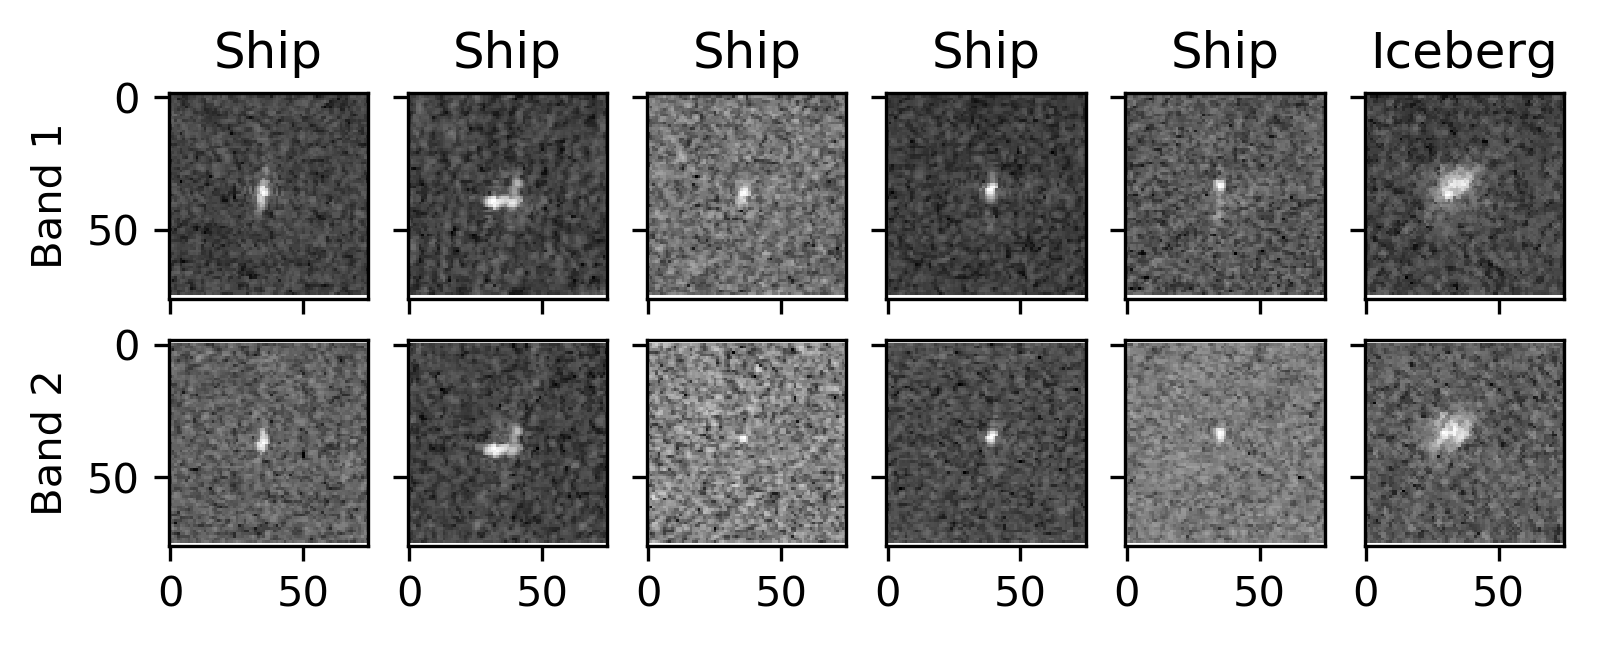

In [74]:
# Let's see how the model arrives at its predictions by visualizing the first 6 training samples with it's predicted label
f, axarr = plt.subplots(nrows=2, ncols=6, sharex=True, sharey=True, figsize=(6,2), dpi=300)
for img in range (6):
    axarr[0, img].imshow(np.array(trainData['band_1'][img]).reshape((75,75)),cmap='binary_r')
    if model.predict([np.expand_dims(bandOneTrain_1ch[img],axis=0), np.expand_dims(bandTwoTrain_1ch[img], axis=0)]) < 0.5:
        axarr[0, img].set_title('Ship')
    else:
        axarr[0, img].set_title('Iceberg')
    axarr[1, img].imshow(np.array(trainData['band_2'][img]).reshape((75,75)),cmap='binary_r')
axarr[0, 0].set_ylabel('Band 1')
axarr[1, 0].set_ylabel('Band 2')
plt.savefig('results.jpg')
plt.show()

In [75]:
# Let's also export our benchmark model's results

# Define the model architecture
model = Sequential()
model.add(Conv2D(filters= 64, kernel_size=5, strides=1, padding='same', activation='elu', input_shape=(75, 75, 1)))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Conv2D(filters= 64, kernel_size=5, strides=1, padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Conv2D(filters= 64, kernel_size=5, strides=1, padding='same', activation='elu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(500, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.load_weights('weights.best.band1benchmark_dropout.hdf5')

is_iceberg = model.predict(bandOneTest)
is_iceberg = np.reshape(is_iceberg, -1)
results = pd.DataFrame({'id': idTest.tolist(), 'is_iceberg': is_iceberg.tolist()})

In [76]:
results

,id,is_iceberg
0,5941774d,0.370493
1,4023181e,0.339330
2,b20200e4,0.015172
3,e7f018bb,0.964600
4,4371c8c3,0.254093
5,a8d9b1fd,0.387156
6,29e7727e,0.177373
7,92a51ffb,0.765955
8,c769ac97,0.004726
9,aee0547d,0.293148


In [77]:
results.to_csv('benchmark_results.csv', index=False)